In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model(optimizer,n=1):
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  
  while(n>1):
    model.add(Dense(600, kernel_initializer='normal', activation='relu'))
    n = n-1 
  
  
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  
  if(optimizer == "SGD"):
    sgd = optimizers.SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov = True)
  
  elif(optimizer == "RMSprop"):
    sgd = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    
  elif(optimizer == "Adagrad"):
    sgd = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
  
  elif(optimizer == "Adadelta"):
    sgd = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
  
  elif(optimizer == "Adam"):
    sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

  elif(optimizer == "Adamax"):
    sgd = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

  elif(optimizer == "Nadam"):
    sgd = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

  elif(optimizer == "TFOptimizer"):
    sgd = optimizers.TFOptimizer(optimizer)
    
    
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [0]:
# build the model

def Model(optimizer,n):
  model = baseline_model(optimizer,n)
  # Fit the model
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Baseline Error: %.2f%%" % (100-scores[1]*100))
  print("Accuracy of {} model is {} % ".format(optimizer,scores[1]*100))
  return history 

In [9]:
SGDHistory = Model("SGD",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.5077 - acc: 0.8619 - val_loss: 0.2939 - val_acc: 0.9177
Epoch 2/10
 - 4s - loss: 0.2737 - acc: 0.9240 - val_loss: 0.2375 - val_acc: 0.9323
Epoch 3/10
 - 4s - loss: 0.2279 - acc: 0.9368 - val_loss: 0.2043 - val_acc: 0.9404
Epoch 4/10
 - 4s - loss: 0.1967 - acc: 0.9460 - val_loss: 0.1827 - val_acc: 0.9469
Epoch 5/10
 - 4s - loss: 0.1732 - acc: 0.9523 - val_loss: 0.1628 - val_acc: 0.9523
Epoch 6/10
 - 4s - loss: 0.1542 - acc: 0.9573 - val_loss: 0.1484 - val_acc: 0.9562
Epoch 7/10
 - 4s - loss: 0.1394 - acc: 0.9618 - val_loss: 0.1369 - val_acc: 0.9596
Epoch 8/10
 - 4s - loss: 0.1266 - acc: 0.9656 - val_loss: 0.1270 - val_acc: 0.9630
Epoch 9/10
 - 4s - loss: 0.1161 - acc: 0.9685 - val_loss: 0.1192 - val_acc: 0.9648
Epoch 10/10
 - 4s - loss: 0.1072 - acc: 0.9711 - val_loss: 0.1120 - val_acc: 0.9666
Baseline Error: 3.34%
Accuracy of SGD model is 96.66 % 


In [10]:
RMSpropHistory = Model("RMSprop",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2711 - acc: 0.9208 - val_loss: 0.1313 - val_acc: 0.9604
Epoch 2/10
 - 5s - loss: 0.1047 - acc: 0.9688 - val_loss: 0.0882 - val_acc: 0.9722
Epoch 3/10
 - 5s - loss: 0.0671 - acc: 0.9802 - val_loss: 0.0719 - val_acc: 0.9770
Epoch 4/10
 - 5s - loss: 0.0477 - acc: 0.9857 - val_loss: 0.0676 - val_acc: 0.9794
Epoch 5/10
 - 5s - loss: 0.0343 - acc: 0.9897 - val_loss: 0.0569 - val_acc: 0.9817
Epoch 6/10
 - 5s - loss: 0.0256 - acc: 0.9926 - val_loss: 0.0616 - val_acc: 0.9812
Epoch 7/10
 - 5s - loss: 0.0187 - acc: 0.9948 - val_loss: 0.0582 - val_acc: 0.9815
Epoch 8/10
 - 5s - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0632 - val_acc: 0.9816
Epoch 9/10
 - 5s - loss: 0.0107 - acc: 0.9972 - val_loss: 0.0640 - val_acc: 0.9827
Epoch 10/10
 - 5s - loss: 0.0076 - acc: 0.9982 - val_loss: 0.0657 - val_acc: 0.9825
Baseline Error: 1.75%
Accuracy of RMSprop model is 98.25 % 


In [11]:
AdagradHistory = Model("Adagrad",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2590 - acc: 0.9281 - val_loss: 0.1368 - val_acc: 0.9607
Epoch 2/10
 - 5s - loss: 0.1150 - acc: 0.9679 - val_loss: 0.1023 - val_acc: 0.9692
Epoch 3/10
 - 5s - loss: 0.0867 - acc: 0.9760 - val_loss: 0.0886 - val_acc: 0.9736
Epoch 4/10
 - 5s - loss: 0.0704 - acc: 0.9806 - val_loss: 0.0803 - val_acc: 0.9755
Epoch 5/10
 - 5s - loss: 0.0591 - acc: 0.9840 - val_loss: 0.0761 - val_acc: 0.9777
Epoch 6/10
 - 5s - loss: 0.0513 - acc: 0.9867 - val_loss: 0.0703 - val_acc: 0.9796
Epoch 7/10
 - 5s - loss: 0.0450 - acc: 0.9886 - val_loss: 0.0676 - val_acc: 0.9798
Epoch 8/10
 - 5s - loss: 0.0398 - acc: 0.9903 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 9/10
 - 5s - loss: 0.0357 - acc: 0.9917 - val_loss: 0.0638 - val_acc: 0.9798
Epoch 10/10
 - 5s - loss: 0.0322 - acc: 0.9927 - val_loss: 0.0630 - val_acc: 0.9803
Baseline Error: 1.97%
Accuracy of Adagrad model is 98.03 % 


In [12]:
AdadeltaHistory = Model("Adadelta",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.3305 - acc: 0.9074 - val_loss: 0.1773 - val_acc: 0.9485
Epoch 2/10
 - 5s - loss: 0.1453 - acc: 0.9577 - val_loss: 0.1134 - val_acc: 0.9675
Epoch 3/10
 - 6s - loss: 0.0996 - acc: 0.9710 - val_loss: 0.0956 - val_acc: 0.9726
Epoch 4/10
 - 6s - loss: 0.0744 - acc: 0.9785 - val_loss: 0.0841 - val_acc: 0.9747
Epoch 5/10
 - 5s - loss: 0.0590 - acc: 0.9836 - val_loss: 0.0713 - val_acc: 0.9784
Epoch 6/10
 - 6s - loss: 0.0475 - acc: 0.9867 - val_loss: 0.0733 - val_acc: 0.9769
Epoch 7/10
 - 6s - loss: 0.0391 - acc: 0.9894 - val_loss: 0.0632 - val_acc: 0.9810
Epoch 8/10
 - 6s - loss: 0.0324 - acc: 0.9915 - val_loss: 0.0672 - val_acc: 0.9791
Epoch 9/10
 - 6s - loss: 0.0267 - acc: 0.9935 - val_loss: 0.0607 - val_acc: 0.9807
Epoch 10/10
 - 6s - loss: 0.0219 - acc: 0.9948 - val_loss: 0.0612 - val_acc: 0.9808
Baseline Error: 1.92%
Accuracy of Adadelta model is 98.08 % 


In [13]:
AdamHistory = Model("Adam",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2761 - acc: 0.9218 - val_loss: 0.1379 - val_acc: 0.9589
Epoch 2/10
 - 5s - loss: 0.1116 - acc: 0.9676 - val_loss: 0.0929 - val_acc: 0.9720
Epoch 3/10
 - 5s - loss: 0.0710 - acc: 0.9796 - val_loss: 0.0757 - val_acc: 0.9765
Epoch 4/10
 - 5s - loss: 0.0497 - acc: 0.9857 - val_loss: 0.0697 - val_acc: 0.9776
Epoch 5/10
 - 5s - loss: 0.0366 - acc: 0.9899 - val_loss: 0.0677 - val_acc: 0.9782
Epoch 6/10
 - 5s - loss: 0.0269 - acc: 0.9931 - val_loss: 0.0644 - val_acc: 0.9789
Epoch 7/10
 - 5s - loss: 0.0195 - acc: 0.9953 - val_loss: 0.0602 - val_acc: 0.9823
Epoch 8/10
 - 5s - loss: 0.0155 - acc: 0.9966 - val_loss: 0.0550 - val_acc: 0.9833
Epoch 9/10
 - 5s - loss: 0.0113 - acc: 0.9976 - val_loss: 0.0602 - val_acc: 0.9824
Epoch 10/10
 - 5s - loss: 0.0077 - acc: 0.9988 - val_loss: 0.0566 - val_acc: 0.9825
Baseline Error: 1.75%
Accuracy of Adam model is 98.25 % 


In [14]:
AdamaxHistory = Model("Adamax",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2868 - acc: 0.9182 - val_loss: 0.1695 - val_acc: 0.9524
Epoch 2/10
 - 5s - loss: 0.1390 - acc: 0.9609 - val_loss: 0.1192 - val_acc: 0.9641
Epoch 3/10
 - 5s - loss: 0.0995 - acc: 0.9720 - val_loss: 0.0956 - val_acc: 0.9710
Epoch 4/10
 - 5s - loss: 0.0745 - acc: 0.9796 - val_loss: 0.0982 - val_acc: 0.9688
Epoch 5/10
 - 5s - loss: 0.0595 - acc: 0.9835 - val_loss: 0.0732 - val_acc: 0.9770
Epoch 6/10
 - 5s - loss: 0.0473 - acc: 0.9873 - val_loss: 0.0736 - val_acc: 0.9775
Epoch 7/10
 - 5s - loss: 0.0388 - acc: 0.9894 - val_loss: 0.0666 - val_acc: 0.9793
Epoch 8/10
 - 5s - loss: 0.0311 - acc: 0.9922 - val_loss: 0.0663 - val_acc: 0.9797
Epoch 9/10
 - 5s - loss: 0.0255 - acc: 0.9941 - val_loss: 0.0589 - val_acc: 0.9815
Epoch 10/10
 - 5s - loss: 0.0206 - acc: 0.9956 - val_loss: 0.0625 - val_acc: 0.9809
Baseline Error: 1.91%
Accuracy of Adamax model is 98.09 % 


In [15]:
NadamHistory = Model("Nadam",1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2351 - acc: 0.9307 - val_loss: 0.1040 - val_acc: 0.9690
Epoch 2/10
 - 6s - loss: 0.0834 - acc: 0.9751 - val_loss: 0.0734 - val_acc: 0.9782
Epoch 3/10
 - 6s - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0673 - val_acc: 0.9781
Epoch 4/10
 - 6s - loss: 0.0333 - acc: 0.9898 - val_loss: 0.0619 - val_acc: 0.9798
Epoch 5/10
 - 6s - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0708 - val_acc: 0.9784
Epoch 6/10
 - 6s - loss: 0.0150 - acc: 0.9958 - val_loss: 0.0587 - val_acc: 0.9827
Epoch 7/10
 - 6s - loss: 0.0114 - acc: 0.9969 - val_loss: 0.0682 - val_acc: 0.9806
Epoch 8/10
 - 6s - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0648 - val_acc: 0.9821
Epoch 9/10
 - 6s - loss: 0.0072 - acc: 0.9982 - val_loss: 0.0669 - val_acc: 0.9830
Epoch 10/10
 - 6s - loss: 0.0070 - acc: 0.9980 - val_loss: 0.0699 - val_acc: 0.9821
Baseline Error: 1.79%
Accuracy of Nadam model is 98.21 % 


In [16]:
#Adam optimizer with 2 layers
AdamHistory2 = Model("Adam",2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2184 - acc: 0.9350 - val_loss: 0.1008 - val_acc: 0.9700
Epoch 2/10
 - 9s - loss: 0.0756 - acc: 0.9767 - val_loss: 0.0725 - val_acc: 0.9781
Epoch 3/10
 - 9s - loss: 0.0454 - acc: 0.9854 - val_loss: 0.0664 - val_acc: 0.9795
Epoch 4/10
 - 9s - loss: 0.0312 - acc: 0.9899 - val_loss: 0.0635 - val_acc: 0.9819
Epoch 5/10
 - 9s - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0651 - val_acc: 0.9807
Epoch 6/10
 - 10s - loss: 0.0164 - acc: 0.9946 - val_loss: 0.0758 - val_acc: 0.9792
Epoch 7/10
 - 10s - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0842 - val_acc: 0.9788
Epoch 8/10
 - 10s - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0725 - val_acc: 0.9810
Epoch 9/10
 - 10s - loss: 0.0146 - acc: 0.9950 - val_loss: 0.0866 - val_acc: 0.9782
Epoch 10/10
 - 9s - loss: 0.0127 - acc: 0.9960 - val_loss: 0.0832 - val_acc: 0.9796
Baseline Error: 2.04%
Accuracy of Adam model is 97.96000000000001 % 


In [17]:
#Adam optimizer with 3 layers
AdamHistory3 = Model("Adam",3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.2089 - acc: 0.9367 - val_loss: 0.0968 - val_acc: 0.9699
Epoch 2/10
 - 13s - loss: 0.0764 - acc: 0.9758 - val_loss: 0.0839 - val_acc: 0.9736
Epoch 3/10
 - 13s - loss: 0.0504 - acc: 0.9840 - val_loss: 0.0643 - val_acc: 0.9789
Epoch 4/10
 - 13s - loss: 0.0340 - acc: 0.9889 - val_loss: 0.0708 - val_acc: 0.9786
Epoch 5/10
 - 13s - loss: 0.0273 - acc: 0.9909 - val_loss: 0.0816 - val_acc: 0.9771
Epoch 6/10
 - 13s - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0752 - val_acc: 0.9808
Epoch 7/10
 - 13s - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0766 - val_acc: 0.9799
Epoch 8/10
 - 13s - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0857 - val_acc: 0.9795
Epoch 9/10
 - 13s - loss: 0.0149 - acc: 0.9952 - val_loss: 0.0927 - val_acc: 0.9767
Epoch 10/10
 - 13s - loss: 0.0140 - acc: 0.9955 - val_loss: 0.0933 - val_acc: 0.9806
Baseline Error: 1.94%
Accuracy of Adam model is 98.06 % 


In [0]:
# list all data in history

def history_opt(history):
  
  print("Accuracy Plot Of Adam Optimizer Model is")
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

Accuracy Plot Of Adam Optimizer Model is
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


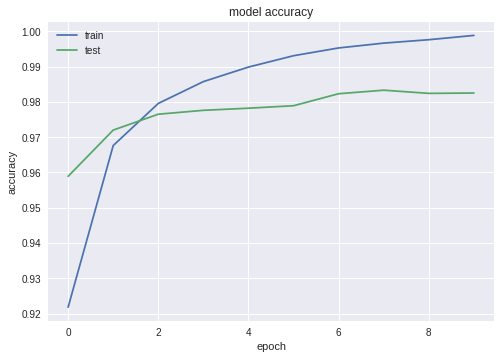

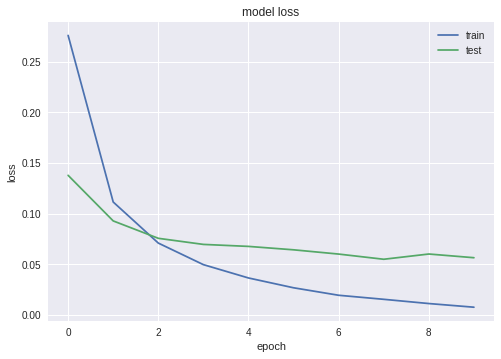

In [20]:

#Plotting of Accuracy Model of Adam Optimizer with 1 hidden layer.
history_opt(AdamHistory)

**So from above we can conclude the Adam optimizer converges till it reaches 8 epochs so there is no point in increasing more epochs.**